<a href="https://colab.research.google.com/github/yukaritk/heart_disease_project/blob/master/heart_disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [6]:
df = pd.read_csv(r'/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df.info()
df.duplicated().sum()
hd = df.drop_duplicates()
hd
hd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

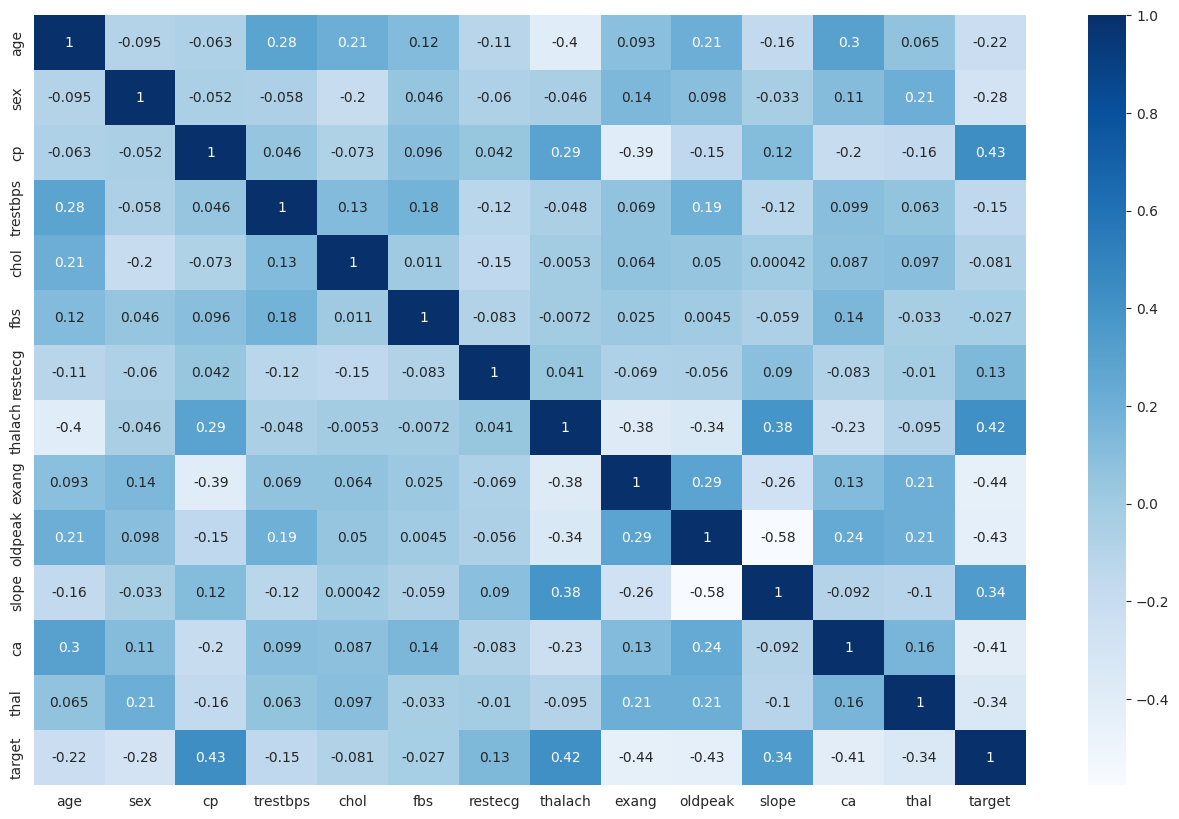

In [9]:
plt.figure(figsize = (16, 10))
sns.heatmap(hd.corr(), annot = True, cmap = 'Blues')

In [10]:
for c in hd.columns:
    print(f"{c}: {hd[c].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [11]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

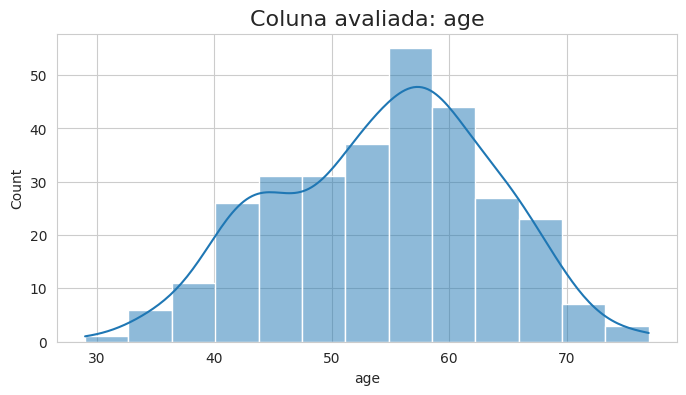

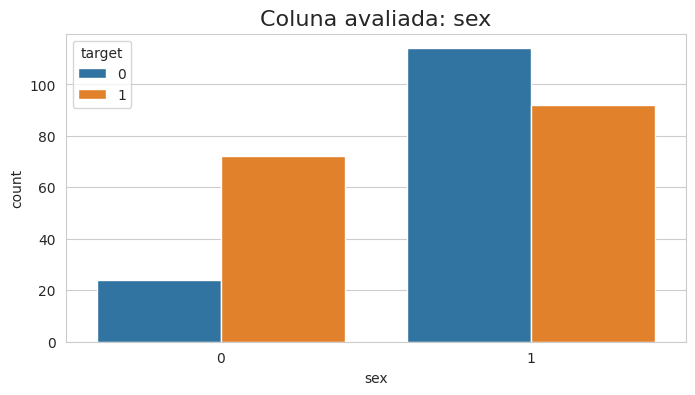

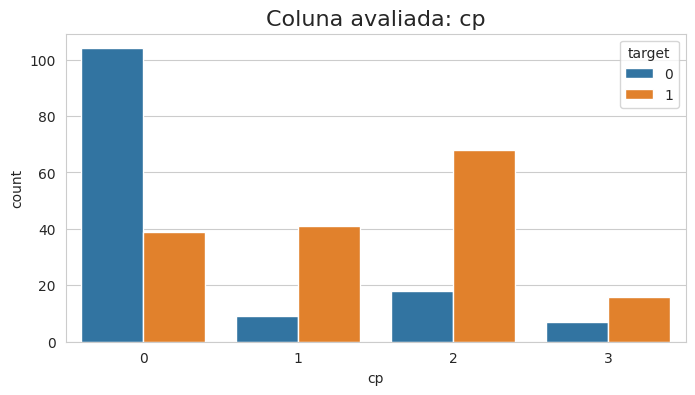

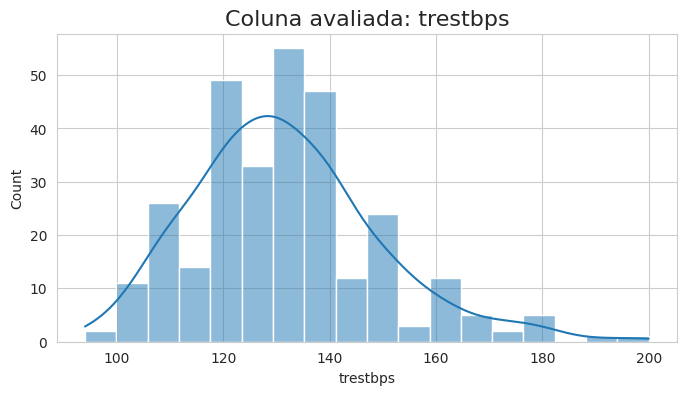

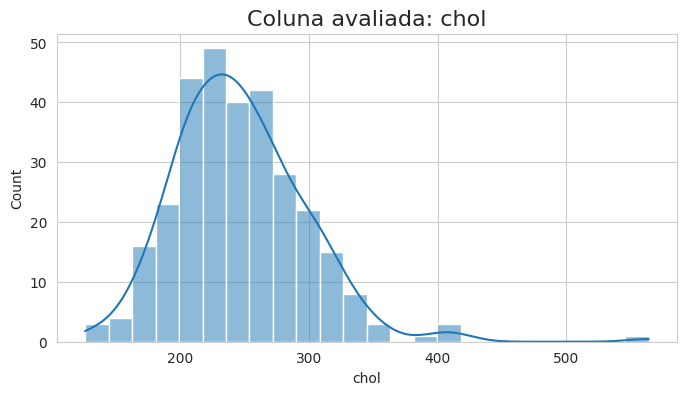

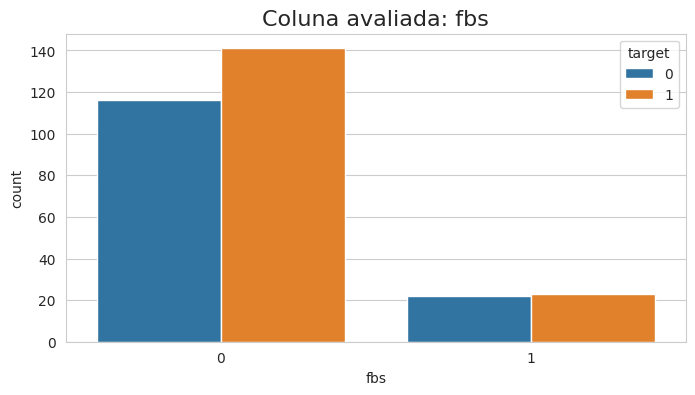

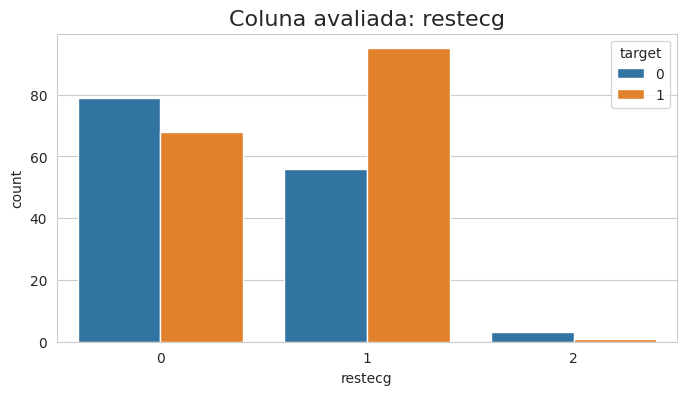

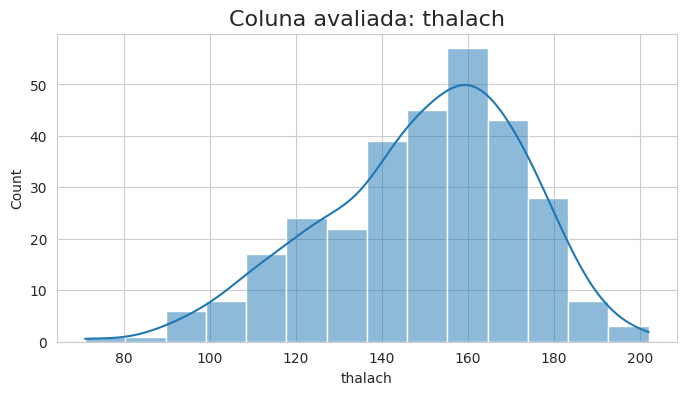

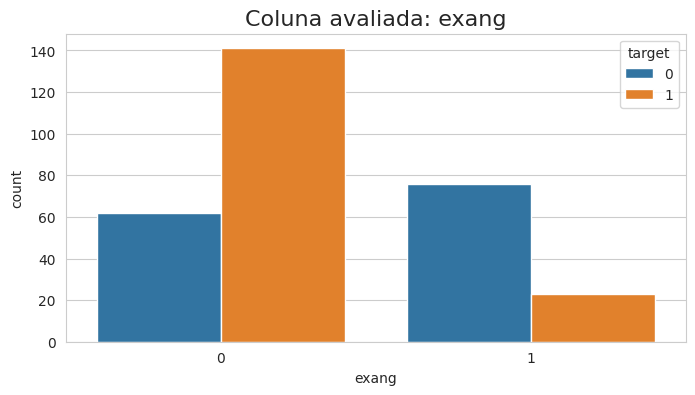

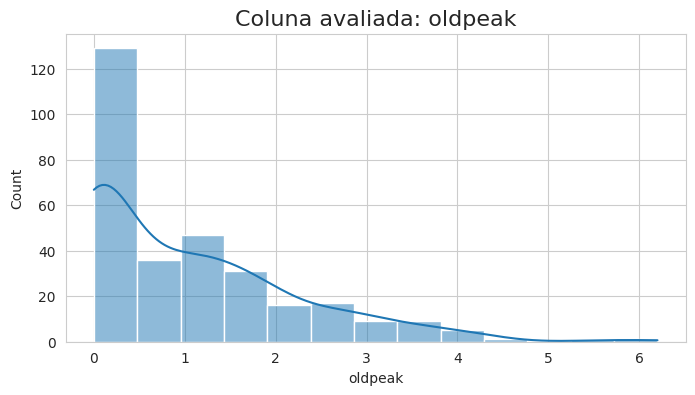

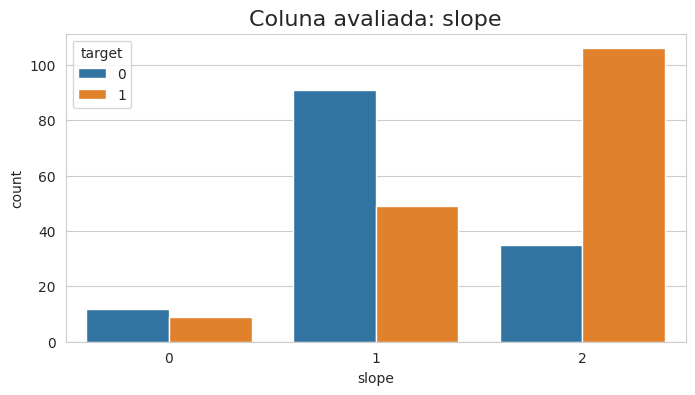

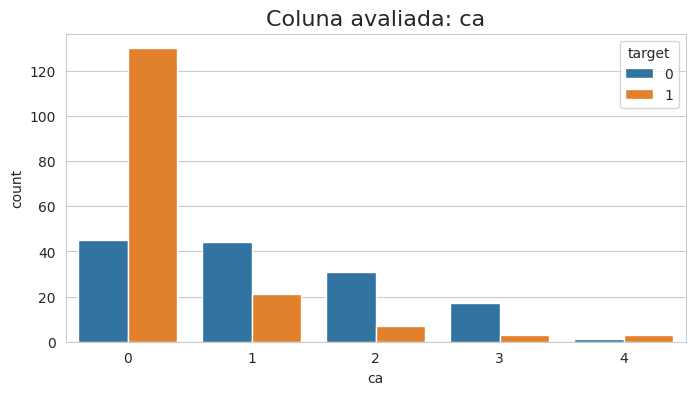

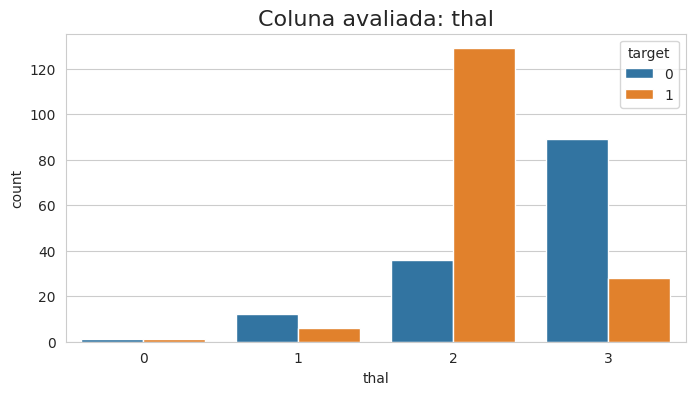

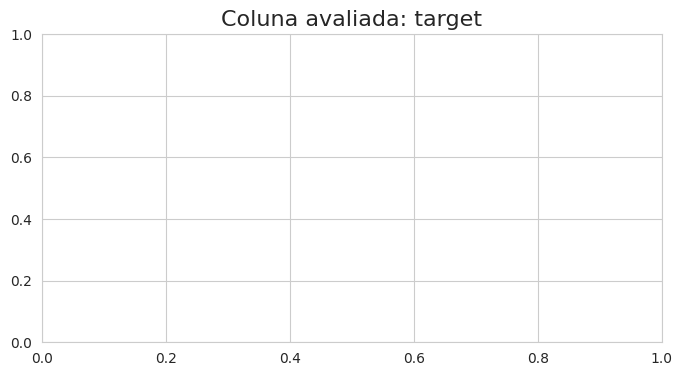

In [12]:
for c in hd.columns:
    plt.figure(figsize = (8,4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x=hd[c], hue = hd['target'])
    if c in numericas:
        sns.histplot(hd[c], kde = True)

# Removendo Outliers

<Axes: >

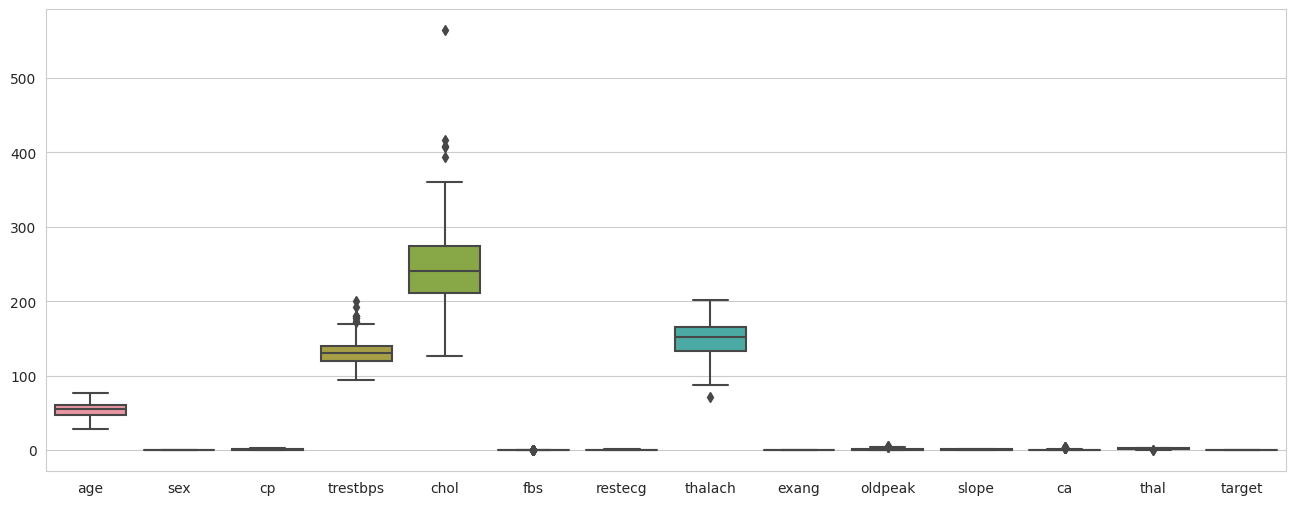

In [13]:
plt.figure(figsize = (16,6))
sns.boxplot(data= hd)

In [14]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
hd['trestbps'].quantile(0.99)

180.0

<Axes: >

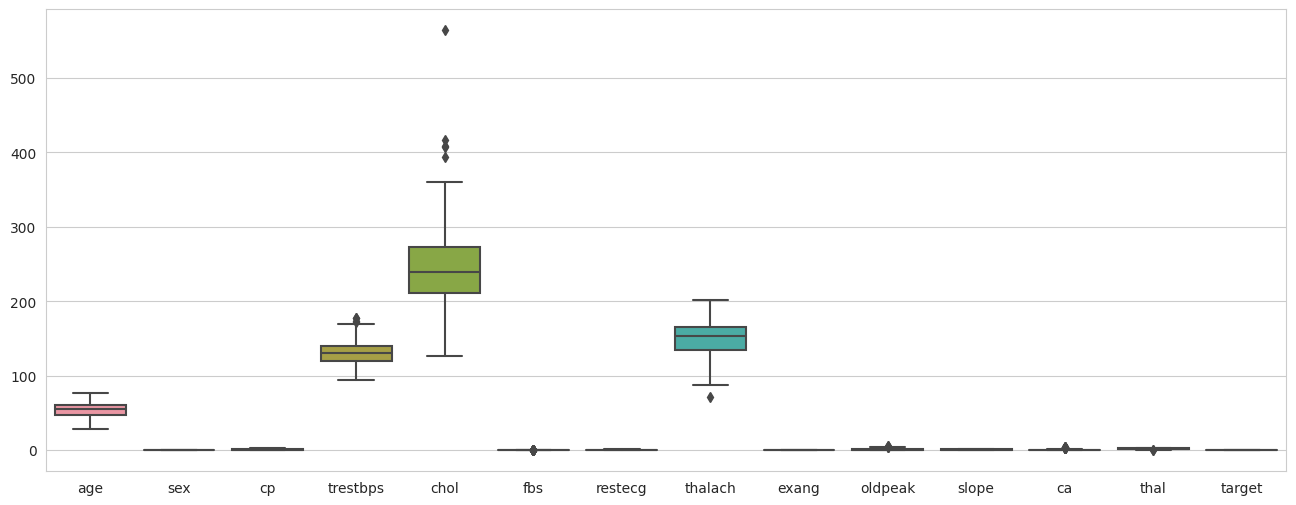

In [17]:
hd1 = hd[hd['trestbps'] < hd['trestbps'].quantile(0.99)]
plt.figure(figsize = (16,6))
sns.boxplot(data= hd1)

<Axes: >

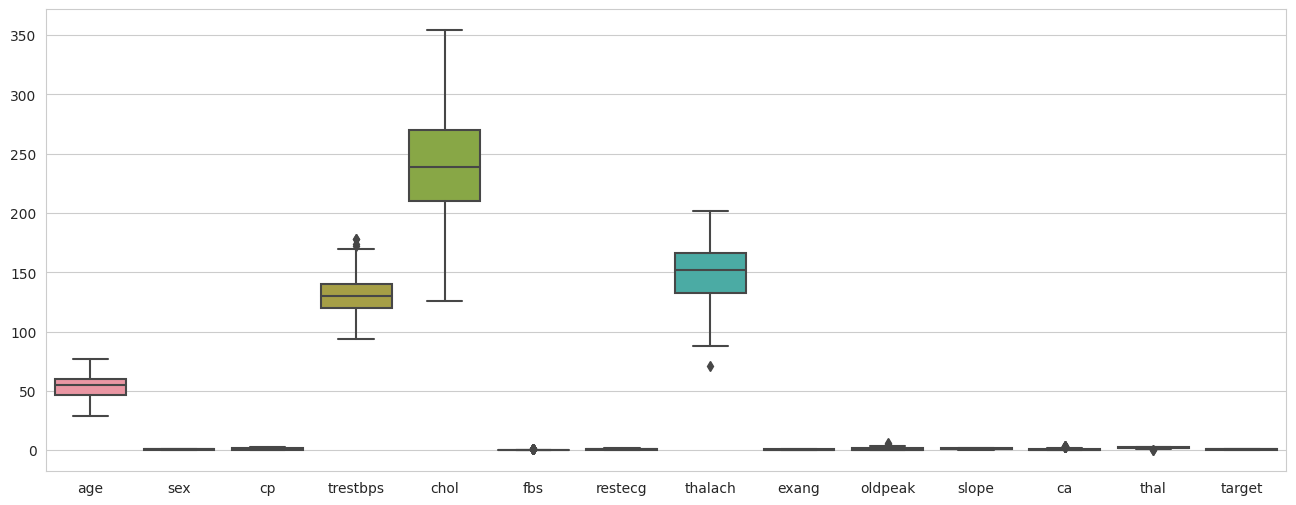

In [18]:
hd2 = hd1[hd1['chol'] < hd1['chol'].quantile(0.98)]
plt.figure(figsize = (16,6))
sns.boxplot(data= hd2)

<Axes: >

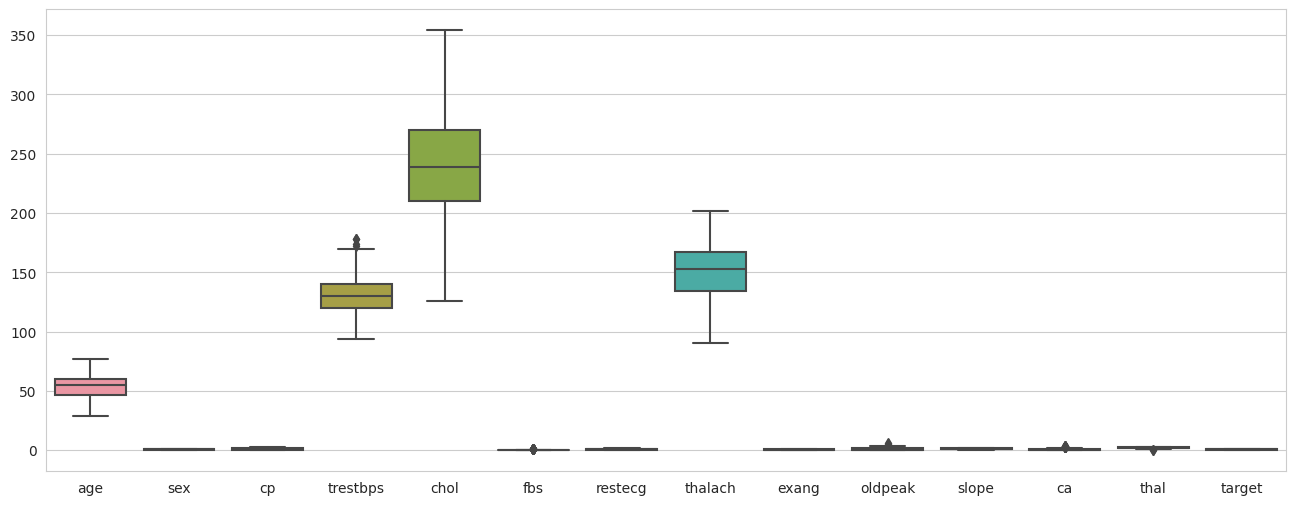

In [19]:
hd3 = hd2[hd2['thalach'] > hd2['thalach'].quantile(0.005)]
plt.figure(figsize = (16,6))
sns.boxplot(data= hd3)

In [20]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

//'thal ','ca ','slope ','oldpeak ','restecg',

In [47]:
hd3_2 = hd3.drop(['thal','ca','slope','oldpeak','restecg'], axis = 1)
hd4 = pd.get_dummies(hd3_2, columns = ['sex', 'cp', 'fbs','exang'])
hd4

,age,trestbps,chol,thalach,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,exang_0,exang_1
0,52,125,212,168,0,0,1,1,0,0,0,1,0,1,0
1,53,140,203,155,0,0,1,1,0,0,0,0,1,0,1
2,70,145,174,125,0,0,1,1,0,0,0,1,0,0,1
3,61,148,203,161,0,0,1,1,0,0,0,1,0,1,0
4,62,138,294,106,0,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1,1,0,0,0,1,0,1,0,1,0
733,44,108,141,175,1,1,0,0,0,1,0,1,0,1,0
739,52,128,255,161,0,0,1,1,0,0,0,1,0,0,1
843,59,160,273,125,0,0,1,0,0,0,1,1,0,1,0


In [39]:
hd4['chol'].max(), hd4['chol'].min()

(354, 126)

In [48]:
import pickle

def relatorio_ml(df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
    
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)

    pkl_filename = "random_forest_model.pkl"

    with open(pkl_filename, 'wb') as file:
      pickle.dump(ml, file)


    print(f"Acurácia do treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia do teste: {score_test * 100:.2f}%")
    
    y_previsto = ml.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
    return score_train, score_test

In [34]:
hd4


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


Acurácia do treino: 80.95%
Acurácia do teste: 75.86%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.78      0.82      0.80        34

    accuracy                           0.76        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.76      0.76      0.76        58

--- CONFUSION MATRIX ---
Acurácia do treino: 100.00%
Acurácia do teste: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        24
           1       0.71      0.88      0.79        34

    accuracy                           0.72        58
   macro avg       0.73      0.69      0.69        58
weighted avg       0.73      0.72      0.71        58

--- CONFUSION MATRIX ---
Acurácia do treino: 86.15%
Acurácia do teste: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   

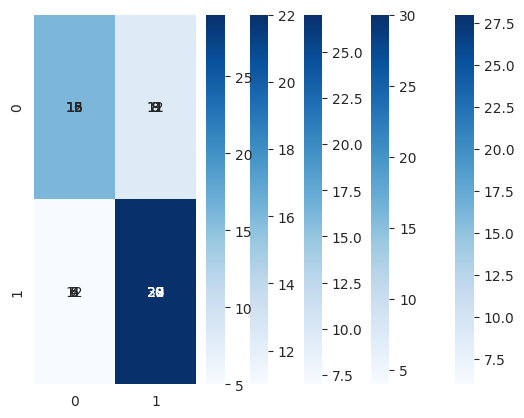

In [41]:
log_train, log_test = relatorio_ml(hd4, LogisticRegression, opt = 0)
tree_train, tree_test = relatorio_ml(hd4, DecisionTreeClassifier)
ada_train, ada_test = relatorio_ml(hd4, AdaBoostClassifier)
kn_train, kn_test = relatorio_ml(hd4, KNeighborsClassifier)
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)

In [42]:
data = {'Models': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest', 'Ada Boost'],
       'Acurácia Treino': [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                          round(rand_train * 100, 2), round(ada_train * 100, 2)],
       'Acurácia Test': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                        round(rand_test * 100, 2), round(ada_test * 100, 2)]}
df = pd.DataFrame(data)
df.sort_values(by='Acurácia Test', ascending = False, inplace = True)
df

,Models,Acurácia Treino,Acurácia Test
3,Random Forest,100.00,77.59
0,Logistic Regression,80.95,75.86
1,Decision Tree,100.00,72.41
4,Ada Boost,86.15,72.41
2,KNeighbors,77.49,60.34


Acurácia do treino: 100.00%
Acurácia do teste: 79.31%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.81      0.85      0.83        34

    accuracy                           0.79        58
   macro avg       0.79      0.78      0.78        58
weighted avg       0.79      0.79      0.79        58

--- CONFUSION MATRIX ---


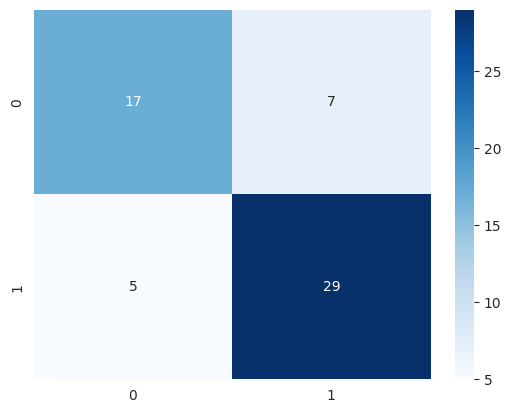

In [49]:
rand_train, rand_test = relatorio_ml(hd4, RandomForestClassifier)